In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\win10\Downloads\archive (3)\kidney_disease.csv')

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
mean_value1 =df['age'].mean()
mean_value2 =df['bp'].mean()
mean_value3 =df['sg'].mean()
mean_value4 =df['al'].mean()
mean_value5 =df['su'].mean()
mean_value6 =df['bgr'].mean()
mean_value7 =df['bu'].mean()
mean_value8 =df['sc'].mean()
mean_value9 =df['sod'].mean()
mean_value10 =df['pot'].mean()
mean_value11=df['hemo'].mean()

In [8]:
df['age'].fillna(mean_value1,inplace=True)
df['bp'].fillna(mean_value2,inplace=True)
df['sg'].fillna(mean_value3,inplace=True)
df['al'].fillna(mean_value4,inplace=True)
df['su'].fillna(mean_value5,inplace=True)
df['bgr'].fillna(mean_value6,inplace=True)
df['bu'].fillna(mean_value7,inplace=True)
df['sc'].fillna(mean_value8,inplace=True)
df['sod'].fillna(mean_value9,inplace=True)
df['pot'].fillna(mean_value10,inplace=True)
df['hemo'].fillna(mean_value11,inplace=True)


In [9]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
mode_value =df['rbc'].mode()[0]
mode_value1 =df['pc'].mode()[0]
mode_value2 =df['pcc'].mode()[0]
mode_value3 =df['ba'].mode()[0]
mode_value4 =df['pcv'].mode()[0]
mode_value5 =df['wc'].mode()[0]
mode_value6 =df['rc'].mode()[0]
mode_value7 =df['htn'].mode()[0]
mode_value8 =df['dm'].mode()[0]
mode_value9 =df['cad'].mode()[0]
mode_value10 =df['appet'].mode()[0]
mode_value11 =df['pe'].mode()[0]
mode_value12 =df['ane'].mode()[0]


In [11]:
df['rbc'].fillna(mode_value,inplace=True)
df['pc'].fillna(mode_value1,inplace=True)
df['pcc'].fillna(mode_value2,inplace=True)
df['ba'].fillna(mode_value3,inplace=True)
df['pcv'].fillna(mode_value4,inplace=True)
df['wc'].fillna(mode_value5,inplace=True)
df['rc'].fillna(mode_value6,inplace=True)
df['htn'].fillna(mode_value7,inplace=True)
df['dm'].fillna(mode_value8,inplace=True)
df['cad'].fillna(mode_value9,inplace=True)
df['appet'].fillna(mode_value10,inplace=True)
df['pe'].fillna(mode_value11,inplace=True)
df['ane'].fillna(mode_value12,inplace=True)


In [12]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
df.nunique()

id                400
age                77
bp                 11
sg                  6
al                  7
su                  7
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               147
bu                119
sc                 85
sod                35
pot                41
hemo              116
pcv                44
wc                 92
rc                 49
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

In [14]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 24.5
Q3: 137.52875399361022
Q1: 2.0
IQR: 135.52875399361022


In [15]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [16]:
upper_bound = df.describe().loc['75%'] + 1.5 * (df.describe().loc['75%'] - df.describe().loc['25%'])
lower_bound = df.describe().loc['25%'] - 1.5 * (df.describe().loc['75%'] - df.describe().loc['25%'])

# Find rows where any of the values exceed the upper bound or fall below the lower bound
upper_array = np.where(df.describe() > upper_bound)[0]
lower_array = np.where(df.describe() < lower_bound)[0]

# Drop rows based on indices
df.drop(index=df.index[upper_array], inplace=True)
df.drop(index=df.index[lower_array], inplace=True)

print("New Shape:", df.shape)

New Shape: (396, 26)


In [17]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [0.03842403 2.06206944 1.6901001  2.26775769 2.26714599 2.26713895
 1.0029202  1.1050499  2.12488614 1.04111138 2.21596963 2.26101146]


In [18]:
log_transformed_data = np.log(skew)

In [19]:
print('skewness:',log_transformed_data)

skewness: [-3.25907230e+00  7.23710062e-01  5.24787755e-01  8.18791542e-01
  8.18521768e-01  8.18518662e-01  2.91594748e-03  9.98904930e-02
  7.53718219e-01  4.02887812e-02  7.95690066e-01  8.15812263e-01]


In [20]:
corre=stats.spearmanr(df.describe())

In [21]:
corre

SignificanceResult(statistic=array([[1.        , 0.95238095, 0.9047619 , 0.88095238, 0.80511756,
        0.73192505, 0.95238095, 0.9047619 , 0.76190476, 0.92857143,
        0.92857143, 0.9047619 ],
       [0.95238095, 1.        , 0.97619048, 0.95238095, 0.75632256,
        0.65873255, 0.95238095, 0.88095238, 0.69047619, 0.97619048,
        0.97619048, 0.97619048],
       [0.9047619 , 0.97619048, 1.        , 0.97619048, 0.68313005,
        0.56114254, 0.92857143, 0.80952381, 0.57142857, 0.95238095,
        0.95238095, 1.        ],
       [0.88095238, 0.95238095, 0.97619048, 1.        , 0.73192505,
        0.60993755, 0.95238095, 0.85714286, 0.61904762, 0.97619048,
        0.97619048, 0.97619048],
       [0.80511756, 0.75632256, 0.68313005, 0.73192505, 1.        ,
        0.975     , 0.78072006, 0.95150257, 0.90270757, 0.80511756,
        0.80511756, 0.68313005],
       [0.73192505, 0.65873255, 0.56114254, 0.60993755, 0.975     ,
        1.        , 0.68313005, 0.90270757, 0.95150257, 0.

In [22]:
corre  = df.describe().values.reshape((2, -1))

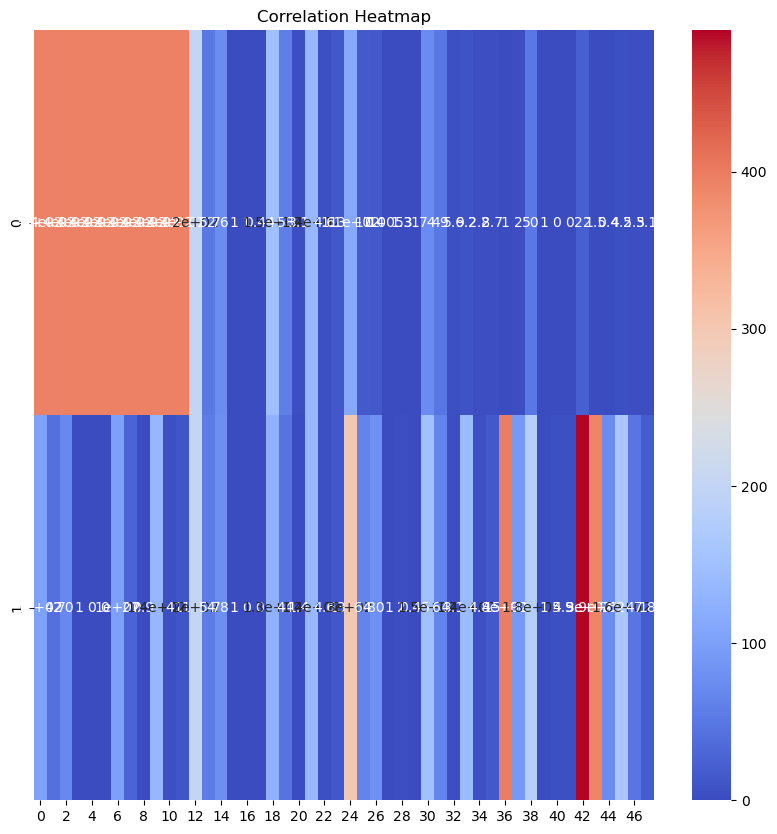

In [23]:
plt.figure(figsize=(10, 10))


sns.heatmap(corre,annot=True,cmap="coolwarm") 


plt.title("Correlation Heatmap")
plt.show()

In [24]:
corre.shape

(2, 48)

In [25]:
from sklearn.decomposition import PCA

# Assuming 'corre' is your correlation matrix

# Define the desired dimensionality after reduction
desired_dimension = 2  # Adjust this value as needed

# Perform PCA for dimensionality reduction
pca = PCA(n_components=desired_dimension)
reduced_corre = pca.fit_transform(corre)

# Dimension of the reduced correlation matrix
print("Dimension of reduced correlation matrix:", reduced_corre.shape)

Dimension of reduced correlation matrix: (2, 2)


In [26]:
reduced_corre

array([[-7.39760765e+02,  2.15835661e-13],
       [ 7.39760765e+02,  2.15835661e-13]])

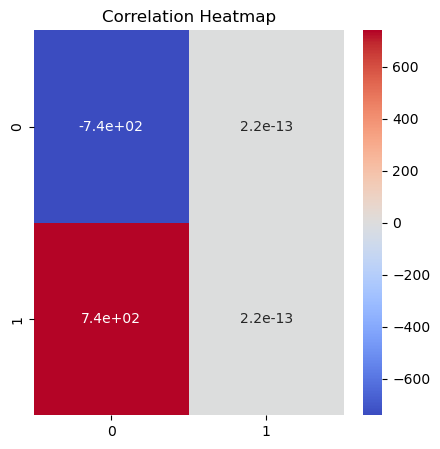

In [27]:
plt.figure(figsize=(5,5))

# Plot the heatmap
sns.heatmap(reduced_corre,annot=True,cmap="coolwarm") 

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [28]:
df_subset=df[['id','age','classification']]

In [29]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'age'")

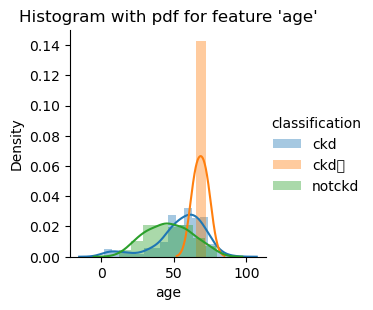

In [30]:
sns.FacetGrid(df_subset,hue='classification').map(sns.distplot,'age').add_legend()
plt.title("Histogram with pdf for feature 'age'")

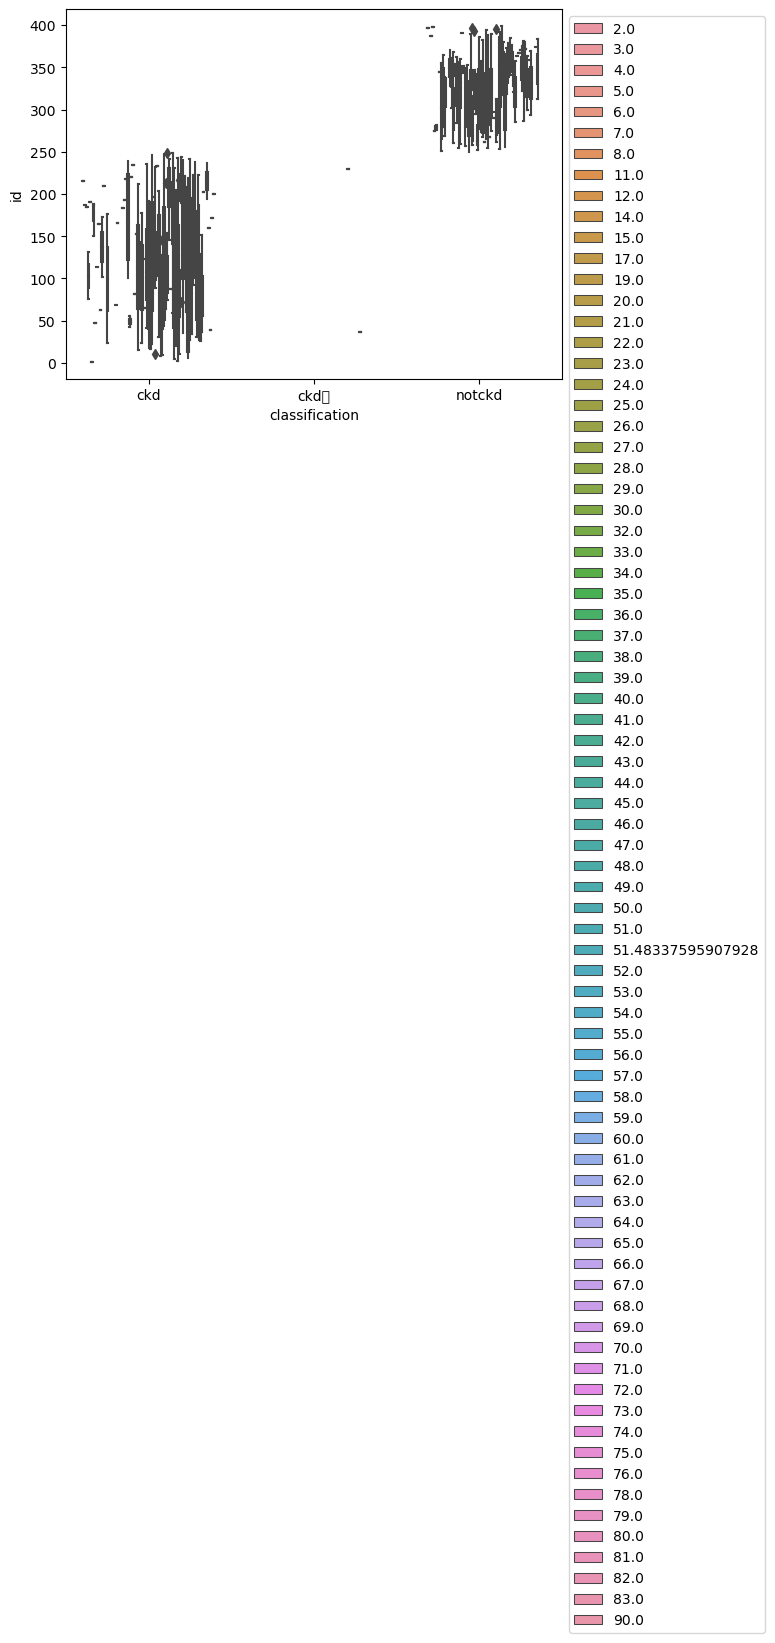

In [31]:
sns.boxplot(data=df_subset,x='classification', y='id',hue='age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

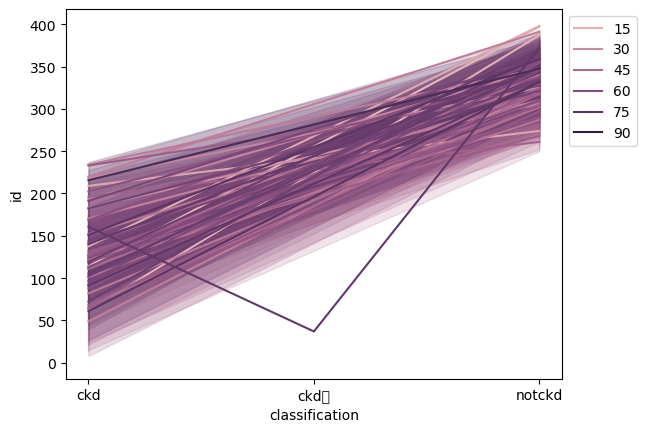

In [32]:
sns.lineplot(data=df_subset,x='classification', y='id',hue='age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

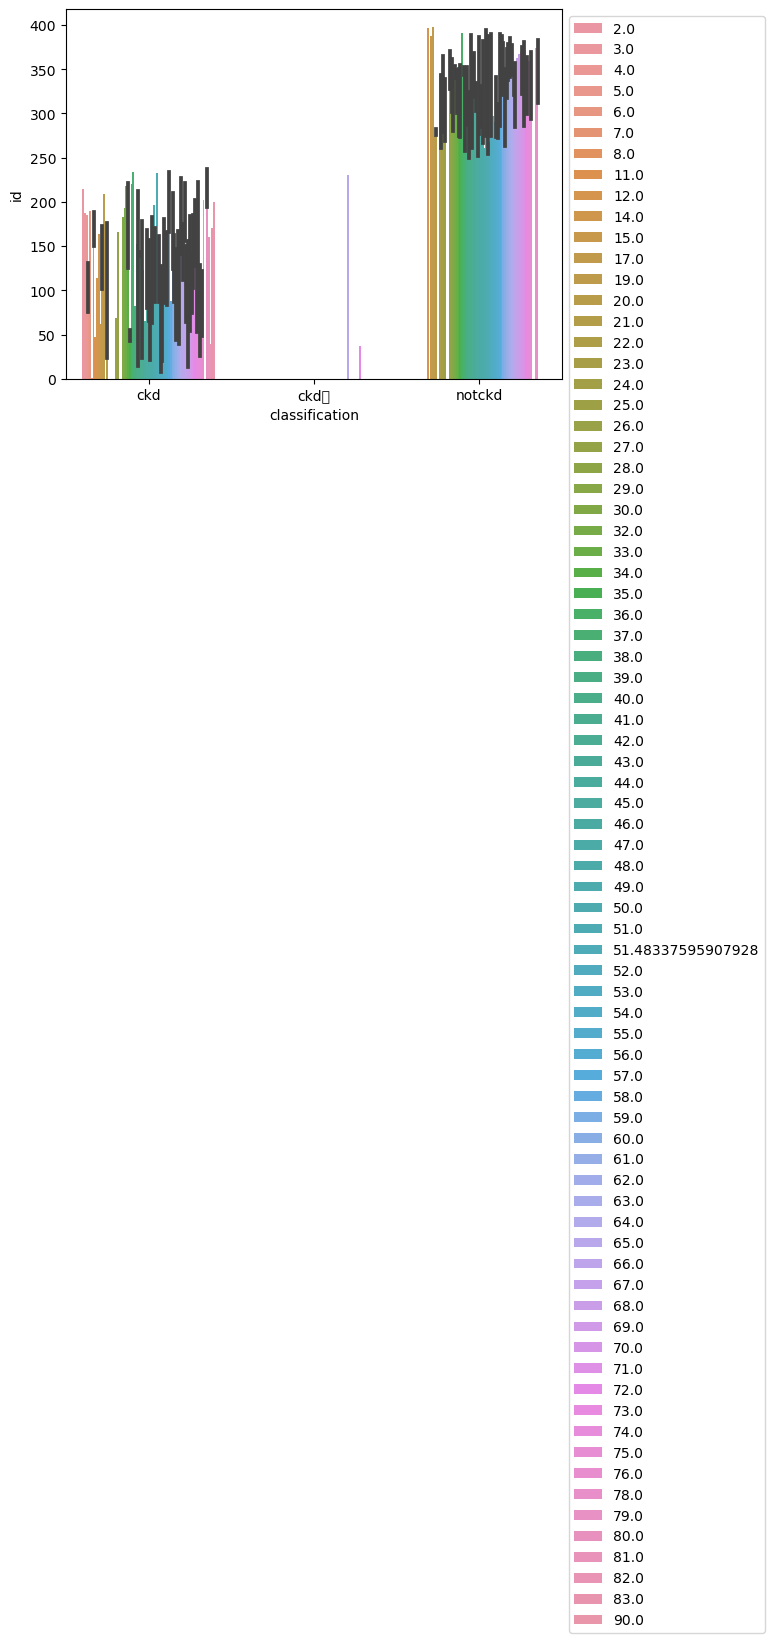

In [33]:
sns.barplot(data=df_subset,x='classification', y='id',hue='age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

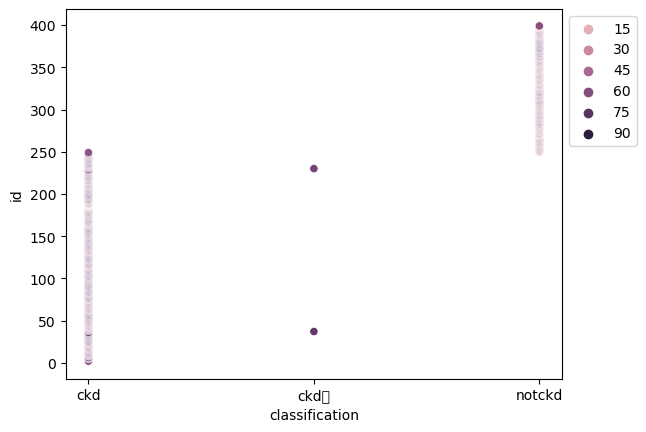

In [34]:
sns.scatterplot(data=df_subset,x='classification', y='id',hue='age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

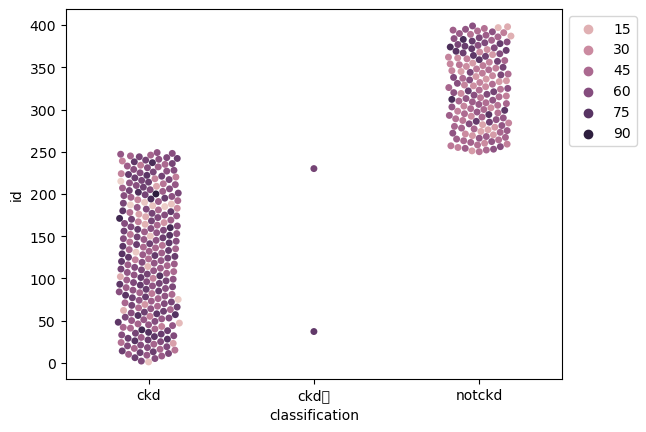

In [35]:
sns.swarmplot(data=df_subset,x='classification', y='id',hue='age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

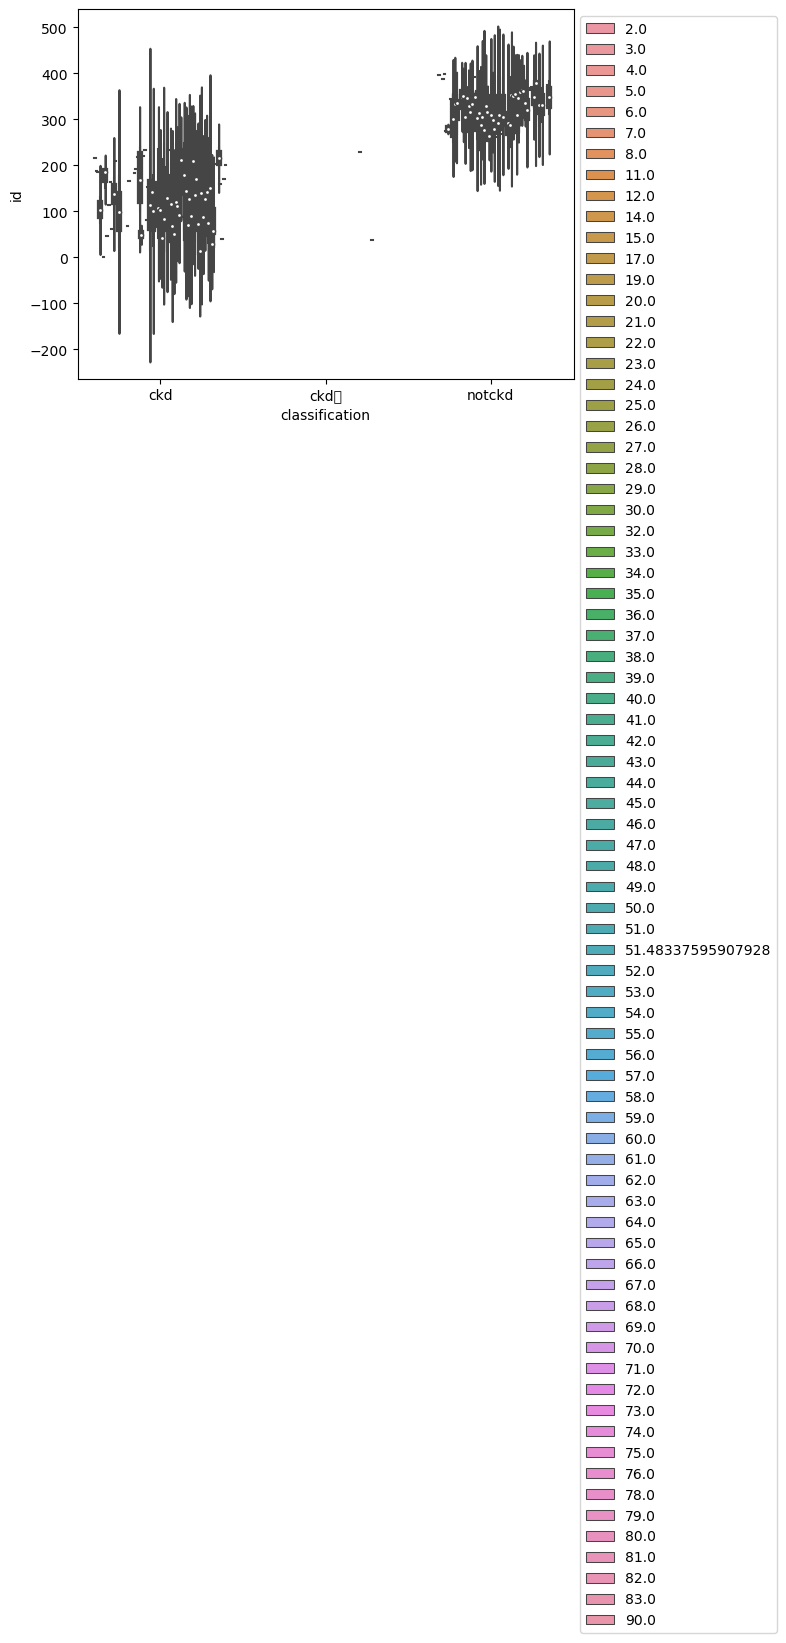

In [36]:
sns.violinplot(data=df_subset,x='classification', y='id',hue='age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Decision Tree

In [37]:
cat_cols=['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']
encoder=OneHotEncoder(drop='first',sparse=False)
encoded_cols=pd.DataFrame(encoder.fit_transform(df[cat_cols]),
                         columns=encoder.get_feature_names_out(cat_cols))

In [38]:
encoded_cols

,rbc_normal,pc_normal,pcc_present,ba_present,pcv_\t?,pcv_14,pcv_15,pcv_16,pcv_17,pcv_18,...,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes,classification_ckd\t,classification_notckd
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
392,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
393,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
394,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
cat_cols1=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']
scaler=StandardScaler()
scaler_cols=pd.DataFrame(scaler.fit_transform(df[cat_cols1]),
                         columns=scaler.get_feature_names_out(cat_cols1))

In [40]:
scaler_cols

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,-1.753213,-2.624787,-1.957514,0.476359,2.365534,-0.437115,0.005535,-0.801941,-0.405327,-0.007328,-0.001899,-0.450207
1,-1.744468,0.614121,0.261254,-1.397233,0.786145,2.512458,3.729220,-0.093683,-0.227906,-0.007328,-0.001899,-1.074887
2,-1.718233,0.496343,1.000844,-0.460437,1.575839,-0.437115,-0.997102,-0.660290,-0.352101,0.481753,-0.506507,-0.119494
3,-1.709488,0.967457,-0.478335,-1.397233,-0.793243,-0.437115,-0.644998,-0.073447,3.710839,-3.674822,-0.223664,-0.046002
4,-1.691998,0.025229,1.740434,-0.460437,1.575839,-0.437115,-0.130384,0.047969,-0.210164,-0.007328,-0.001899,-0.633936
...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.692351,0.201896,0.261254,0.476359,-0.793243,-0.437115,-0.103299,-0.174627,-0.458553,1.356821,0.094535,1.166613
392,1.701096,-0.563664,-0.478335,1.413156,-0.793243,-0.437115,-0.983560,-0.538874,-0.334359,0.372369,-0.400441,1.460580
393,1.709841,-2.330341,0.261254,0.476359,-0.793243,-0.437115,-0.644998,-0.640054,-0.440811,-0.065165,-0.082242,1.203359
394,1.718586,-2.035895,-1.217925,1.413156,-0.793243,-0.437115,-0.455403,-0.154391,-0.369843,-0.283932,0.094535,0.615425


In [41]:
x= pd.concat([encoded_cols,scaler_cols],axis=1)
y=df['classification']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [44]:
model=DecisionTreeClassifier()

In [45]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
print(f"Training score : {model.score(x_train,y_train)}")
print(f"Testing score : {model.score(x_test,y_test)}")

Training score : 1.0
Testing score : 1.0


In [47]:
y_pred=model.predict(x_test)

In [48]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [49]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
        ckd	       1.00      1.00      1.00         1
      notckd       1.00      1.00      1.00        27

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [50]:
print('confusion matrixs:', metrics.confusion_matrix(y_test,y_pred))

confusion matrixs: [[52  0  0]
 [ 0  1  0]
 [ 0  0 27]]


In [51]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns=['Pred0','Pred1','Pred2'],
                     index=['Act0','Act1','Act2'])

In [52]:
cnfTrain

,Pred0,Pred1,Pred2
Act0,52,0,0
Act1,0,1,0
Act2,0,0,27


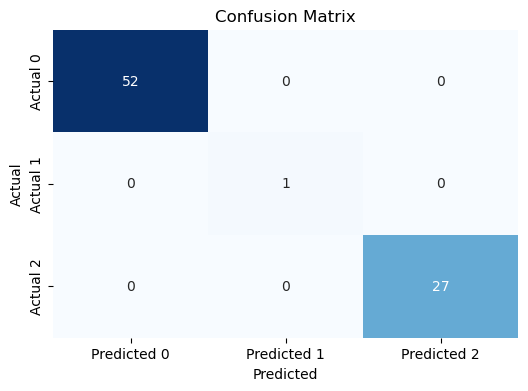

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(cnfTrain, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1','Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1','Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Grid Serach CV

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [55]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [56]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [57]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [58]:
y_pred=best_model.predict(x_test)

In [59]:
acc=metrics.accuracy_score(y_test,y_pred)
print('ACC:',acc)

ACC: 0.9875


# Random Forest

In [60]:
model=RandomForestClassifier()

In [61]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
print(f"Training score : {model.score(x_train,y_train)}")
print(f"Testing score : {model.score(x_test,y_test)}")

Training score : 1.0
Testing score : 0.9875


In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9875


In [65]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        52
        ckd	       0.00      0.00      0.00         1
      notckd       1.00      1.00      1.00        27

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



In [66]:
print('confusion matrixs:', metrics.confusion_matrix(y_test,y_pred))

confusion matrixs: [[52  0  0]
 [ 1  0  0]
 [ 0  0 27]]


In [67]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns=['Pred0','Pred1','Pred2'],
                     index=['Act0','Act1','Act2'])

In [68]:
cnfTrain

,Pred0,Pred1,Pred2
Act0,52,0,0
Act1,1,0,0
Act2,0,0,27


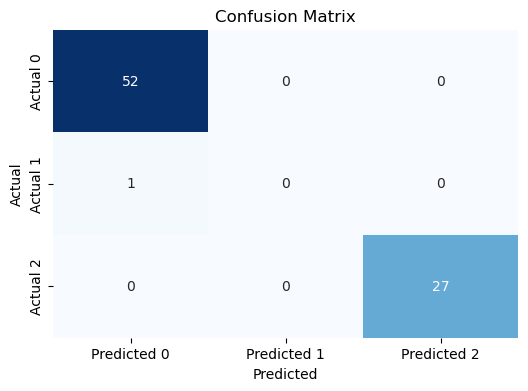

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(cnfTrain, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1','Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1','Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Grid Search CV

In [70]:
param_grid={
    'bootstrap': [True, False],
    'max_depth': [None,10, 20, 30, 40,50],
    'n_estimators': [10,50,100,150]
}

In [71]:
grid_search= GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [72]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [10, 50, 100, 150]})

In [73]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [74]:
y_pred=best_model.predict(x_test)

In [75]:
acc=metrics.accuracy_score(y_test,y_pred)
print('ACC:',acc)

ACC: 0.9875
